# Flight Data Analysis - Airbus

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## I. Data Set

In [110]:
#Removals = pd.read_excel("..\Flight_Data_Analysis\INSA-Airbus FHS - Data set_bis.xlsx", sheet_name='Removals')
! wget -P . https://github.com/nghitruyen/Flight_Data_Analysis/blob/main/INSA-Airbus%20FHS%20-%20Data%20set_ter.xlsx
Removals = pd.read_excel("INSA-Airbus FHS - Data set_ter.xlsx", sheet_name='Removals')
SNlist = pd.read_excel("INSA-Airbus FHS - Data set_ter.xlsx", sheet_name='SN_list')

--2020-11-09 22:42:53--  https://github.com/nghitruyen/Flight_Data_Analysis/blob/main/INSA-Airbus%20FHS%20-%20Data%20set_ter.xlsx
Résolution de github.com (github.com)… 140.82.121.3
Connexion à github.com (github.com)|140.82.121.3|:443… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : non indiqué [text/html]
Enregistre : «./INSA-Airbus FHS - Data set_ter.xlsx.5»

INSA-Airbus FHS - D     [ <=>                ]  83,21K  --.-KB/s    ds 0,08s   

2020-11-09 22:42:54 (984 KB/s) - «./INSA-Airbus FHS - Data set_ter.xlsx.5» enregistré [85203]



In [111]:
Removals.info()
Removals.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2388 entries, 0 to 2387
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer                       2388 non-null   int64         
 1   Removal date                   2388 non-null   datetime64[ns]
 2   P/N                            2388 non-null   object        
 3   Description                    2388 non-null   object        
 4   S/N                            2388 non-null   object        
 5   Maintenance Type               2388 non-null   object        
 6   TSI (Flight Hours) at removal  2296 non-null   float64       
 7   TSN (Flight Hours) at Removal  2335 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 149.4+ KB


,Customer,Removal date,P/N,Description,S/N,Maintenance Type,TSI (Flight Hours) at removal,TSN (Flight Hours) at Removal
0,3,2015-01-01,C,PN_C,15323054356,Unscheduled,5819.0,5819.0
1,3,2015-01-01,C,PN_C,15323057041,Unscheduled,5819.0,5819.0
2,3,2015-01-03,C,PN_C,15323072973,Unscheduled,3036.0,3036.0
3,3,2015-01-07,C,PN_C,15323053425,Unscheduled,5614.0,5614.0
4,3,2015-01-07,C,PN_C,15323058236,Unscheduled,5614.0,5614.0


In [112]:
SNlist.info()
SNlist.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5785 entries, 0 to 5784
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Part Number                     5785 non-null   object 
 1   Description                     5785 non-null   object 
 2   Serial Number                   5785 non-null   object 
 3   Current SN Status Description   5785 non-null   object 
 4   Company                         5784 non-null   object 
 5   Hour ageing Since Installation  5745 non-null   float64
 6   Hour ageing Since New           5637 non-null   float64
 7   Since New Date                  4350 non-null   object 
dtypes: float64(2), object(6)
memory usage: 361.7+ KB


,Part Number,Description,Serial Number,Current SN Status Description,Company,Hour ageing Since Installation,Hour ageing Since New,Since New Date
0,A,PN_A,XXXM01-00324,On Aircraft,5,39498.39,54222.37,2007-11-19 00:00:00
1,A,PN_A,XXXM01-00329,On Aircraft,5,54525.41,54525.41,2007-11-19 00:00:00
2,A,PN_A,XXXM01-00334,On Aircraft,5,32238.92,52831.08,2008-03-12 00:00:00
3,A,PN_A,XXXM01-00337,On Aircraft,5,6951.19,52169.46,2006-04-01 00:00:00
4,A,PN_A,XXXM01-00338,On Aircraft,5,55511.55,55511.55,2008-03-12 00:00:00


##### Combining Removals and SNlist :

In [113]:
fail_and_not = SNlist.copy()
fail_and_not['failed'] = False
fail_and_not[fail_and_not['Current SN Status Description']=='In Outside Repair']=True
fail_and_not = fail_and_not.drop(['Description','Current SN Status Description','Since New Date','Company'], axis = 1)
fail_and_not = fail_and_not.rename(columns={"Part Number": "PN", "Serial Number": "SN", "Hour ageing Since Installation": "TSI", "Hour ageing Since New": "TSN"})

fail = Removals[Removals['Maintenance Type']=='Unscheduled']
fail = fail.drop(['Customer','Removal date','Description','Maintenance Type'], axis=1)
fail = fail.rename(columns={"P/N": "PN", "S/N": "SN", "TSI (Flight Hours) at removal": "TSI", "TSN (Flight Hours) at Removal": "TSN"})
fail['failed'] = True 

all_SN = pd.unique(fail_and_not['SN'])
SN_Removals = pd.unique(fail['SN'])

# fail_not_in_SN = SN_Removals
# fail_in_SN = fail[fail['SN'] in fail_and_not['SN']]
combined = pd.concat([fail,fail_and_not], ignore_index=True)
combined = combined.drop_duplicates(subset=['SN','PN','TSN'], keep='last')

##### Data errors treatment

In [114]:
combined['TSI']=combined['TSI'].replace(np.nan, 0.0)
combined['TSN']=combined['TSN'].replace(np.nan, 0.0)
combined = combined[combined['TSI']!=0]
combined

,PN,SN,TSI,TSN,failed
0,C,15323054356,5819,5819,True
1,C,15323057041,5819,5819,True
2,C,15323072973,3036,3036,True
3,C,15323053425,5614,5614,True
4,C,15323058236,5614,5614,True
...,...,...,...,...,...
8064,A,XXXM01-11910,29625,29625,False
8065,A,XXXM01-11911,29625,29625,False
8066,A,XXXM01-11912,29625,29625,False
8115,C-new,15323085461,2545,20478.2,False


In [115]:
print(len(set(combined['SN'])),'/',len(combined), 'distinct number part.')

5970 / 7677 distinct number part.


## II. Data Visualization 

### 1. Type A, B, C

Number of samples in total :  7677


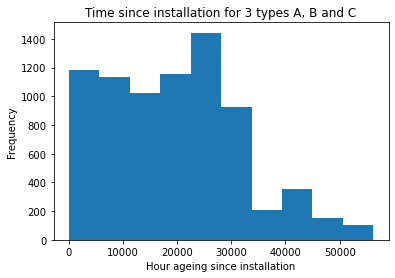

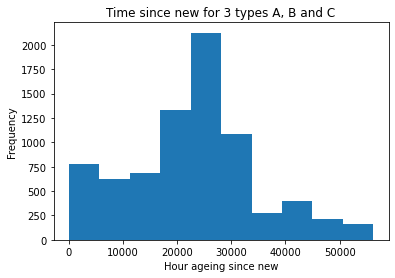

In [76]:
plt.hist(combined['TSI'],bins=10)
plt.ylabel('Frequency')
plt.xlabel('Hour ageing since installation')
plt.title('Time since installation for 3 types A, B and C')
plt.figure()
plt.hist(combined['TSN'],bins=10)
plt.ylabel('Frequency')
plt.xlabel('Hour ageing since new')
plt.title('Time since new for 3 types A, B and C')

print("Number of samples in total : ", len(combined['TSI']))

### 2. Type A

Number of samples type A :  3144


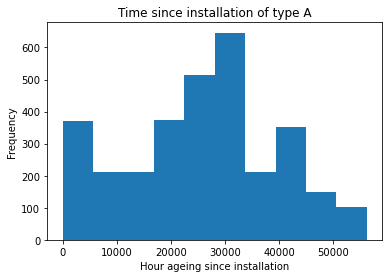

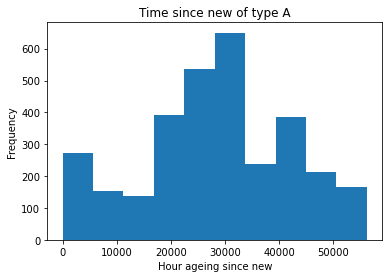

In [77]:
plt.hist(combined[combined['PN']=='A']['TSI'],bins=10)
plt.ylabel('Frequency')
plt.xlabel('Hour ageing since installation')
plt.title('Time since installation of type A')
plt.figure()
plt.hist(combined[combined['PN']=='A']['TSN'],bins=10)
plt.ylabel('Frequency')
plt.xlabel('Hour ageing since new')
plt.title('Time since new of type A')

print("Number of samples type A : ", len(combined[combined['PN']=='A']['TSI']))

### 3. Type B

Number of samples type B :  262


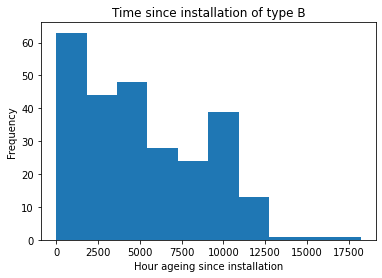

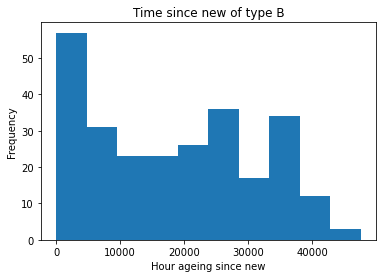

In [90]:
plt.hist(combined[combined['PN']=='B']['TSI'],bins=10)
plt.ylabel('Frequency')
plt.xlabel('Hour ageing since installation')
plt.title('Time since installation of type B')
plt.figure()
plt.hist(combined[combined['PN']=='B']['TSN'],bins=10)
plt.ylabel('Frequency')
plt.xlabel('Hour ageing since new')
plt.title('Time since new of type B')

print("Number of samples type B : ", len(combined[combined['PN']=='B']['TSI']))

### 4. Type C

Number of samples type C :  4270


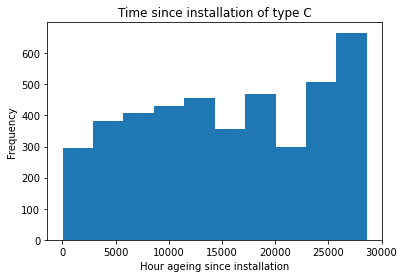

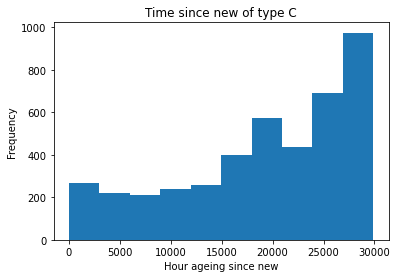

In [122]:
C = pd.concat([combined[combined['PN']=='C'],combined[combined['PN']=='C-new']], ignore_index=True)
plt.hist(C['TSI'],bins=10)
plt.ylabel('Frequency')
plt.xlabel('Hour ageing since installation')
plt.title('Time since installation of type C')
plt.figure()
plt.hist(C['TSN'],bins=10)
plt.ylabel('Frequency')
plt.xlabel('Hour ageing since new')
plt.title('Time since new of type C')

print("Number of samples type C : ", len(C['TSI']))

## III. Data Analysis

##### Exponential distribution for type B data

- Estimating the $\lambda$ coefficient with censoring data :

In [87]:
combined_B = combined[combined['PN']=='B']
# Without censored data
combined_B_TSI = combined_B['TSI'] 
# With censored data
#combined_B_TSI = combined_B[combined_B['failed'] == True]['TSI'] 
lamb = len(combined_B_TSI)/np.sum(combined[combined['PN']=='B']['TSI'])
print('lambda =', lamb)
print("Number of data type B :",len(combined_B))
print('Number of censored data :',len(combined_B)-len(combined_B_TSI))

lambda = 0.00019516071156846864
Number of data type B : 262
Number of censored data : 0


- Plotting simulated data :

Text(0.5, 1.0, 'Exponential distribution for type B data')

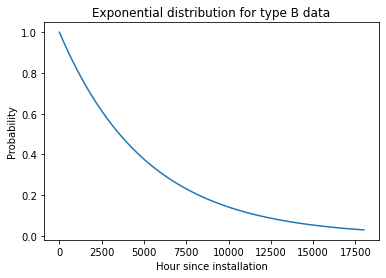

In [88]:
t=np.linspace(0,18000,1000000)
y=pow(np.e,-lamb*t)
plt.plot(t,y)
plt.ylabel('Probability')
plt.xlabel('Hour since installation')
plt.title('Exponential distribution for type B data')

- Mean time to faillure :

In [123]:
print('The average time since installation of type B :', 1/lamb, 'hours.')

The average time since installation of type B : 5123.982137404577 hours.
